You need to find a chessboard on an image. Once you do you need to figure out where all the pieces are. After that you need to figure out if either king is in check. For maximum points figure out if that check is a checkmate.

In [1]:
You are provided with a path to a folder in a form of <prefix>/<test_case_num> where <test_case_num> is the current test case. The folder's structure is as follows:

<test_case_num>:
│   <test_case_num>.png
│
├───pieces
│   ├───black
│   │       bishop.png
│   │       king.png
│   │       knight.png
│   │       pawn.png
│   │       queen.png
│   │       rook.png
│   │
│   └───white
│           bishop.png
│           king.png
│           knight.png
│           pawn.png
│           queen.png
│           rook.png
│
└───tiles
        black.png
        white.png

SyntaxError: invalid syntax (<ipython-input-1-aea5c79cabc0>, line 1)

0,0 is at the top left corner of the larger picture. From this point if you move down you increase the first coordinate, and if you move to the right you increase the second coordinate.

In [1]:
!pwd

/e/machine_learning/projects/petnica-ml7/checkmate


In [2]:
import os
import PIL
from PIL import Image
import numpy as np

In [3]:
chessboard_dim=8
black_tile_px_val=[180, 136, 102]
white_tile_px_val=[240, 217, 183]
nothing_px_val=[0,0,0]

In [4]:
test_case=0

data_pth=os.path.join('data/public/set/',str(test_case))

img_pths={}
img_pths['input']=os.path.join(data_pth,str(test_case)+'.png')

for root, dirs, files in os.walk(data_pth, topdown=False):
    for name in files:
        if not name.split('.')[0].isnumeric():
            desc=os.path.normpath(root).split(os.path.sep)[-1]
            dict_key_name=desc+'_'+name.split('.')[0]
            img_pths[dict_key_name]=os.path.join(root,name)


In [5]:
img_pths

{'input': 'data/public/set/0\\0.png',
 'black_bishop': 'data/public/set/0\\pieces\\black\\bishop.png',
 'black_king': 'data/public/set/0\\pieces\\black\\king.png',
 'black_knight': 'data/public/set/0\\pieces\\black\\knight.png',
 'black_pawn': 'data/public/set/0\\pieces\\black\\pawn.png',
 'black_queen': 'data/public/set/0\\pieces\\black\\queen.png',
 'black_rook': 'data/public/set/0\\pieces\\black\\rook.png',
 'white_bishop': 'data/public/set/0\\pieces\\white\\bishop.png',
 'white_king': 'data/public/set/0\\pieces\\white\\king.png',
 'white_knight': 'data/public/set/0\\pieces\\white\\knight.png',
 'white_pawn': 'data/public/set/0\\pieces\\white\\pawn.png',
 'white_queen': 'data/public/set/0\\pieces\\white\\queen.png',
 'white_rook': 'data/public/set/0\\pieces\\white\\rook.png',
 'tiles_black': 'data/public/set/0\\tiles\\black.png',
 'tiles_white': 'data/public/set/0\\tiles\\white.png'}

In [6]:
a=np.asarray(Image.open(img_pths['input']))

In [7]:
a

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [8]:
a.shape

(514, 425, 3)

In [9]:
def find_beggining(img):
    beggining_found=False
    beggining_position=None
    offset=None
    for row_px in range(img.shape[0]):
        for col_px in range(img.shape[1]):
            position_px_val=img[row_px,col_px,:]
            if np.array_equal(position_px_val,white_tile_px_val) and not beggining_found:
                beggining_position=np.array([row_px,col_px])
                beggining_found=True
            
            if np.array_equal(position_px_val,black_tile_px_val):
                offset=(np.array([row_px,col_px])-beggining_position)[1]
                break
        if beggining_found:
            break
    
#     print(','.join(map(str,beggining_position)))
    return beggining_position, offset
    
img=np.asarray(Image.open(img_pths['input']))
print(find_beggining(img))

(array([140,  62]), 30)


In [10]:
def cut_chessboard(img, begging_position, offset):
    return img[begging_position[0]:begging_position[0]+8*offset,
              begging_position[1]:begging_position[1]+8*offset,
              :]

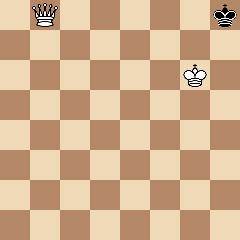

In [11]:
im=Image.fromarray(cut_chessboard(img, [140,62], 30))
im

In [12]:
fig_to_int={
    'bishop':1,
    'king':2,
    'knight':3,
    'pawn':4,
    'queen':5,
    'rook':6
           }

def get_tiles(img, offset):
    
    crops=[]
    for i in range(0,offset*8, offset):
        for j in range(0,offset*8, offset):
            crop=img[i:i+offset,j:j+offset]
            crops.append(crop)
#             display(Image.fromarray(crop))
    return crops
crops=get_tiles(cut_chessboard(img,[140,62],30),30)

In [13]:
def get_figure_array(img_pth):
    return np.asarray((Image.open(img_pth).convert('RGB').resize((30,30))))

In [14]:
def get_background_masks(img_pths):
    # in order to neutralize background from image we set the backgroud mask of that figure to 0
    
    background_masks={}
    
    #for background mask extraction color doesnt matter
    background_masks['king']=get_figure_array(img_pths['white_king'])==0
    background_masks['knight']=get_figure_array(img_pths['white_knight'])==0
    background_masks['pawn']=get_figure_array(img_pths['white_pawn'])==0
    background_masks['queen']=get_figure_array(img_pths['white_queen'])==0
    background_masks['rook']=get_figure_array(img_pths['white_rook'])==0         
    background_masks['bishop']=get_figure_array(img_pths['white_bishop'])==0
    return background_masks

background_masks=get_background_masks(img_pths)

In [15]:
# Unit test
white_queen=get_figure_array(img_pths['white_queen'])
white_queen_on_black=crops[1]
display(Image.fromarray(white_queen))
display(Image.fromarray(white_queen_on_black))

queen_background_mask=background_masks['queen']

white_queen_on_black_no_background=white_queen_on_black.copy()
white_queen_on_black_no_background[queen_background_mask]=0
display(Image.fromarray(white_queen_on_black_no_background))

In [16]:
# doesnt work that good
unique_vals_white=[]
unique_vals_black=[]
for i in range(0,25,1):
    name=f"{i}"

    pth=f"data/public/set/{name}/{name}.png"
    img=np.asarray(Image.open(pth))
    beggining_position, offset= find_beggining(img)
    chessboard=cut_chessboard(img, beggining_position, offset)
    tiles=get_tiles(chessboard, offset)
    
    for tile in tiles:
        if np.array_equal(tile[0][0],np.array(black_tile_px_val)):
            px_count=np.prod(tile.shape)
            background_px_count=np.sum((tile==black_tile_px_val))
            ratio=background_px_count/px_count
            if ratio not in unique_vals_black:
                display(Image.fromarray(tile))

                unique_vals_black.append(ratio)
                print(ratio)
            
        else:
            px_count=np.prod(tile.shape)
            background_px_count=np.sum(tile==white_tile_px_val)
            ratio=background_px_count/px_count
            if ratio not in unique_vals_white:
                display(Image.fromarray(tile))
                print(ratio)

                unique_vals_white.append(ratio)
print(unique_vals_black)
print(unique_vals_white)
    

1.0


0.5962962962962963


1.0


0.64


0.64


0.5955555555555555


0.5955555555555555


0.6407407407407407


0.7444444444444445


0.7459259259259259


0.6511111111111111


0.7207407407407408


0.72


0.5866666666666667


0.6511111111111111


0.5866666666666667
[0.5962962962962963, 1.0, 0.64, 0.5955555555555555, 0.7459259259259259, 0.7207407407407408, 0.5866666666666667, 0.6511111111111111]
[1.0, 0.64, 0.5955555555555555, 0.6407407407407407, 0.7444444444444445, 0.6511111111111111, 0.72, 0.5866666666666667]


In [17]:
# doesnt work that good
unique_tiles=[]
for i in range(0,25,1):
    name=f"{i}"

    pth=f"data/public/set/{name}/{name}.png"
    img=np.asarray(Image.open(pth))
    beggining_position, offset= find_beggining(img)
    chessboard=cut_chessboard(img, beggining_position, offset)
    tiles=get_tiles(chessboard, offset)
    
    for tile in tiles:
            bool_in=False
            for unique in unique_tiles:
                if np.array_equal(unique,tile):
                    bool_in=True
            
            if not bool_in:
                figname=px_sum_to_figname[np.sum(tile)]
                print(figname)
                display(Image.fromarray(tile))
                unique_tiles.append(tile)
    

NameError: name 'px_sum_to_figname' is not defined

In [ ]:
for item in unique_tiles:
    display(Image.fromarray(item))

In [ ]:
px_sum_to_figname={
    576000:'white_tile',
    341724:'white_queen',
    376200:'black_tile',
    314357:'black_king',
    518109:'white_king',
    386936:'white_king',
    384771:'black_knight',
    261591:'black_knight',
    445530:'black_king',
    555722:'white_pawn',
    405205:'white_pawn',
    433925:'black_pawn',
    283408:'black_pawn',
    512160:'white_rook',
    537129:'white_knight',
    365691:'white_bishop',
    512395:'white_bishop',
    466042:'white_queen',
    278589:'black_queen',
    295386:'black_bishop',
    377478:'white_rook',
    285648:'black_rook',
    413949:'white_knight',
    420330:'black_rook',
    401317:'black_queen',
    442090:'black_bishop'
}

In [ ]:
len(unique_tiles)

In [ ]:
sums=[np.sum(matrix) for matrix in unique_tiles]

In [ ]:
#elimnate background
crop1_cp=crops[1].copy()
crop7_cp=crops[7].copy()
crop1_cp[crop1_cp==black_tile_px_val]=0
crop7_cp[crop7_cp==black_tile_px_val]=0
white_queen=crop1_cp
black_king=crop7_cp
display(Image.fromarray(white_queen))
display(Image.fromarray(black_king))

In [ ]:
white_queen_s=get_figure_array(img_pths['white_queen'])
black_king_s=get_figure_array(img_pths['black_king'])
display(Image.fromarray(white_queen_s))
display(Image.fromarray(black_king_s))


In [204]:
np.sqrt(np.sum((black_king-black_king_s)**2))

269.82216365599027

In [205]:
np.sqrt(np.sum((black_king-black_king_s)**2))

269.82216365599027

In [199]:

for i in range(0,25,1):
    name=f"{i}"

    pth=f"data/public/set/{name}/{name}.png"
    img=np.asarray(Image.open(pth))
    beggining_position, offset= find_beggining(img)
    chessboard=cut_chessboard(img, beggining_position, offset)
    tiles=get_tiles(chessboard, offset)
    
    for tile in tiles:
        if np.array_equal(tile[0][0],np.array(black_tile_px_val)):
            figure=tile.copy()
            figure[figure==black_tile_px_val]=0
            
            min_loss=10000
            fig_match=None
            
            for key, value in img_pths.items():
                compare_figure=get_figure_array(value)
                loss=np.sqrt(np.sum((figure-compare_figure)**2))
                if loss< min_loss:
                    min_loss=loss
                    fig_match=key
                    
            print(fig_match)
            display(Image.fromarray(tile))
            
        else:
            figure=tile.copy()
            figure[figure==white_tile_px_val]=0
            
            min_loss=10000
            fig_match=None
            
            for key, value in img_pths.items():
                compare_figure=get_figure_array(value)
                loss=np.sqrt(np.sum((figure-compare_figure)**2))
                if loss< min_loss:
                    min_loss=loss
                    fig_match=key
            
            print(fig_match)
            display(Image.fromarray(tile))



black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


black_pawn


KeyboardInterrupt: 

In [ ]:
px_sum_to_figname={
    576000:'1',
    341724:'Q',
    376200:'1',
    314357:'k',
    518109:'K',
    386936:'K',
    384771:'n',
    261591:'n',
    445530:'k',
    555722:'P',
    405205:'P',
    433925:'p',
    283408:'p',
    512160:'R',
    537129:'N',
    365691:'B',
    512395:'B',
    466042:'Q',
    278589:'q',
    295386:'b',
    377478:'R',
    285648:'r',
    413949:'N',
    420330:'r',
    401317:'q',
    442090:'b'
}

def recognize_figure(tile):
    px_sum=np.sum(tile)
    figure_name=px_sum_to_figname[px_sum]
                
    return figure_name

recognize_figure(crops[7])
        

                



In [130]:
def update_danger_matrix(figure, position, figure_matrix, danger_matrix):
    i,j=position
    
    
    if figure=='P':
        #checking down right diagonal
        i_cp,j_cp=position
        i_cp+=1
        j_cp+=1
        while(i_cp<8 and j_cp<8):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                break
            else:
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                    
            i_cp+=1
            j_cp+=1
        
        #checking up left diagonal
        i_cp,j_cp=position
        i_cp-=1
        j_cp-=1
        while(i_cp>-1 and j_cp>-1):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                break
            else:
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                    
            i_cp-=1
            j_cp-=1 
            
        #checking up right diagonal
        i_cp,j_cp=position
        i_cp-=1
        j_cp+=1
        while(i_cp>-1 and j_cp<8):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                break
            else:
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                    
            i_cp-=1
            j_cp+=1
            
        #checking up right diagonal
        i_cp,j_cp=position
        i_cp+=1
        j_cp-=1
        while(i_cp<8 and j_cp>-1):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                break
            else:
                if danger_matrix[i_cp][j_cp]==2:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=1
                    
            i_cp+=1
            j_cp-=1
        
    if figure=='N':
        pass
    if figure=='B':
        pass
    if figure=='R':
        pass
    if figure=='Q':
        pass
    if figure=='K':
        pass
    
    if figure=='p':
        #checking down right diagonal
        i_cp,j_cp=position
        i_cp+=1
        j_cp+=1
        while(i_cp<8 and j_cp<8):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                break
            else:
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                    
            i_cp+=1
            j_cp+=1
        
        #checking up left diagonal
        i_cp,j_cp=position
        i_cp-=1
        j_cp-=1
        while(i_cp>-1 and j_cp>-1):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                break
            else:
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                    
            i_cp-=1
            j_cp-=1 
            
        #checking up right diagonal
        i_cp,j_cp=position
        i_cp-=1
        j_cp+=1
        while(i_cp>-1 and j_cp<8):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                break
            else:
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                    
            i_cp-=1
            j_cp+=1
            
        #checking up right diagonal
        i_cp,j_cp=position
        i_cp+=1
        j_cp-=1
        while(i_cp<8 and j_cp>-1):

            if figure_matrix[i_cp][j_cp] in 'pnbrqkPNBRQK':
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                break
            else:
                if danger_matrix[i_cp][j_cp]==1:
                    danger_matrix[i_cp][j_cp]=3
                else:
                    danger_matrix[i_cp][j_cp]=2
                    
            i_cp+=1
            j_cp-=1
        
#     if figure=='n':
#         pass
#     if figure=='b':
#         pass
#     if figure=='r':
#         pass
#     if figure=='q':
#         pass
#     if figure=='k':
#         pass
    
    
    
    return danger_matrix

In [132]:
mtx=[['1', '1', '1', '1', '1', '1', '1', 'k'],
['1', '1', '1', '1', '1', '1', '1', '1'],
['1', '1', '1', '1', '1', '1', 'K', '1'],
['1', '1', '1', '1', '1', '1', '1', '1'],
['1', '1', '1', '1', '1', '1', '1', '1'],
['1', '1', '1', '1', '1', '1', '1', '1'],
['1', '1', '1', '1', '1', '1', '1', '1'],
['1', '1', '1', '1', '1', '1', '1', '1'],]

dng_mtx=np.zeros((8,8))

dng_mtx=update_danger_matrix('p', (1,2), mtx, dng_mtx)
dng_mtx=update_danger_matrix('P', (5,6), mtx, dng_mtx)


for i in dng_mtx:
    print(i)

[0. 3. 0. 2. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0.]
[0. 2. 0. 3. 0. 0. 0. 0.]
[2. 0. 0. 0. 3. 0. 0. 0.]
[0. 0. 0. 0. 0. 3. 0. 1.]
[0. 0. 0. 0. 0. 0. 2. 0.]
[0. 0. 0. 0. 0. 1. 0. 3.]
[0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
def is_anybody_giving_check()

In [90]:
def numericalize_chessboard(img, img_pths):
    
    # task 1
    beggining_position, offset= find_beggining(img)
    print(','.join([str(x) for x in beggining_position]))
    
    # task 2
    chessboard=cut_chessboard(img, beggining_position, offset)
    tiles=get_tiles(chessboard, offset)
    background_masks=get_background_masks(img_pths)
    
    chessboard_num=np.zeros((8,8))

    fen_notation=''
    blank_field_cum=0
    for idx,tile in enumerate(tiles):   
        figure_name=recognize_figure(tile)
        if figure_name in 'pnbrqkPNBRQK':
            if blank_field_cum>0:
                fen_notation+=str(blank_field_cum)
                blank_field_cum=0
            fen_notation+=figure_name
        else: 
            blank_field_cum+=1
            
        if (idx+1)%8==0:
            if blank_field_cum>0:
                fen_notation+=str(blank_field_cum)
                blank_field_cum=0
                
            # dont write last slash
            if (idx+1)%64!=0:
                fen_notation+='/'
                
    print(fen_notation)
    
    # task 3
    
    figure_matrix=[
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                    ['','','','','','','',''],
                ]
    # tells where figures can reach for an attack
    # 0 if cant reach, 1 if white can reach, 2 if black can reach, 3 if both can reach
    danger_matrix=np.zeros((10,10))
    
    for idx,tile in enumerate(tiles):
        figure_name=recognize_figure(tile)
        
        pos_2d=((idx)//8, (idx)%8)
        figure_matrix[pos_2d[0]][pos_2d[1]]=figure_name
        
    for i in range(8):
        for j in range(8):
            figure=figure_matrix[i][j]
            if figure in 'pnbrqkPNBRQK':
                update_danger_matrix(figure, (i,j) , danger_matrix)
    
    
    
    # pprint
    for i in range(8):
        print(figure_matrix[i])
    
    



img=np.asarray(Image.open(img_pths['input']))
numericalize_chessboard(img, img_pths)

140,62
1Q5k/8/6K1/8/8/8/8/8
['1', 'Q', '1', '1', '1', '1', '1', 'k']
['1', '1', '1', '1', '1', '1', '1', '1']
['1', '1', '1', '1', '1', '1', 'K', '1']
['1', '1', '1', '1', '1', '1', '1', '1']
['1', '1', '1', '1', '1', '1', '1', '1']
['1', '1', '1', '1', '1', '1', '1', '1']
['1', '1', '1', '1', '1', '1', '1', '1']
['1', '1', '1', '1', '1', '1', '1', '1']


In [80]:
9%8

1

In [81]:
9//8

1

In [76]:
(64)%8==0 and (64)%64!=0

False

In [ ]:
        figure_name=recognize_figure(tile)
        if figure_name in 'pnbrqkPNBRQK':
            fen_notation.append(figure_name)
        if (idx+1)%8==0:
            fen_notation.append('/')

In [20]:
int(False)

0

In [22]:
not True

False

In [24]:
inputed=input()
img_pth=os.path.join(inputed+'/'+inputed.split('/')[-1]+'.png')
print(img_pth)

prefix/0
prefix/0/0.png


In [ ]:
E:\machine_learning\projects\petnica-ml7\checkmate\data\public\set\1\1.png